In [363]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings(action='ignore')

In [274]:
auto=pd.read_csv('Automobile_insurance_fraud.csv')

In [275]:
auto

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Explanatory Data Analysis

In [276]:
auto.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [277]:
auto.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [278]:
auto.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [279]:
auto.shape

(1000, 40)

In [280]:
#finding null values
auto.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [281]:
auto.duplicated().sum()

0

In [282]:
auto['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [283]:
auto['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [284]:
#convering string values to integer using encoder
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
auto['policy_state']=a.fit_transform(auto['policy_state'])
auto['incident_date']=a.fit_transform(auto['incident_date'])

auto['collision_type']=a.fit_transform(auto['collision_type'])

auto['authorities_contacted']=a.fit_transform(auto['authorities_contacted'])

auto['insured_relationship']=a.fit_transform(auto['insured_relationship'])

auto['insured_occupation']=a.fit_transform(auto['insured_occupation'])

auto['incident_location']=a.fit_transform(auto['incident_location'])

auto['incident_state']=a.fit_transform(auto['incident_state'])
auto['incident_city']=a.fit_transform(auto['incident_city'])
auto['property_damage']=a.fit_transform(auto['property_damage'])
auto['auto_make']=a.fit_transform(auto['auto_make'])
auto['auto_model ']=a.fit_transform(auto['auto_model'])
auto['fraud_reported']=a.fit_transform(auto['fraud_reported'])
auto['police_report_available']=a.fit_transform(auto['police_report_available'])

In [285]:
auto

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,auto_model
0,328,48,521585,17-10-2014,2,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,10,92x,2004,1,NaN,1
1,228,42,342868,27-06-2006,1,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,8,E400,2007,1,NaN,12
2,134,29,687698,06-09-2000,2,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,4,RAM,2007,0,NaN,30
3,256,41,227811,25-05-1990,0,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,3,Tahoe,2014,1,NaN,34
4,228,44,367455,06-06-2014,0,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,0,RSX,2009,0,NaN,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2,500/1000,1000,1310.80,0,431289,...,87200,17440,8720,61040,6,Accord,2006,0,NaN,6
996,285,41,186934,05-01-2014,0,100/300,1000,1436.79,0,608177,...,108480,18080,18080,72320,13,Passat,2015,0,NaN,28
997,130,34,918516,17-02-2003,2,250/500,500,1383.49,3000000,442797,...,67500,7500,7500,52500,11,Impreza,1996,0,NaN,19
998,458,62,533940,18-11-2011,0,500/1000,2000,1356.92,5000000,441714,...,46980,5220,5220,36540,1,A5,1998,0,NaN,5


In [286]:
#dropping the unnecessary columns
auto=auto.drop(columns='policy_bind_date',axis=1)


In [287]:
auto=auto.drop(columns='policy_csl',axis=1)
auto=auto.drop(columns='insured_sex',axis=1)
auto=auto.drop(columns='insured_education_level',axis=1)

In [288]:
auto=auto.drop(columns='incident_type',axis=1)
auto=auto.drop(columns='incident_severity',axis=1)


In [289]:
auto=auto.drop(columns='insured_hobbies',axis=1)

auto=auto.drop(columns='_c39',axis=1)

auto=auto.drop(columns='auto_model',axis=1)

In [290]:
auto.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'collision_type',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'auto_model '],
      dtype='object')

In [291]:
auto.shape

(1000, 32)

# Statistical Summary

In [292]:
auto.describe()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,auto_model
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,1136.000000,1256.406150,1.101000e+06,501214.488000,6.653000,2.416000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,2005.103000,0.247000,19.318000
std,115.113174,9.140287,257063.005276,0.83096,611.864673,244.167395,2.297407e+06,71701.610941,4.019048,1.681003,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,6.015861,0.431483,11.136107
min,0.000000,19.000000,100804.000000,0.00000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,500.000000,1089.607500,0.000000e+00,448404.500000,3.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000,10.000000
50%,199.500000,38.000000,533135.000000,1.00000,1000.000000,1257.200000,0.000000e+00,466445.500000,7.000000,2.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,2005.000000,0.000000,20.000000
75%,276.250000,44.000000,759099.750000,2.00000,2000.000000,1415.695000,0.000000e+00,603251.000000,10.000000,4.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,2010.000000,0.000000,29.000000
max,479.000000,64.000000,999435.000000,2.00000,2000.000000,2047.590000,1.000000e+07,620962.000000,13.000000,5.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,2015.000000,1.000000,38.000000


In [293]:
auto.mean()

months_as_customer             2.039540e+02
age                            3.894800e+01
policy_number                  5.462386e+05
policy_state                   1.014000e+00
policy_deductable              1.136000e+03
policy_annual_premium          1.256406e+03
umbrella_limit                 1.101000e+06
insured_zip                    5.012145e+05
insured_occupation             6.653000e+00
insured_relationship           2.416000e+00
capital-gains                  2.512610e+04
capital-loss                  -2.679370e+04
incident_date                  2.937600e+01
collision_type                 1.666000e+00
authorities_contacted          2.167000e+00
incident_state                 3.242000e+00
incident_city                  2.966000e+00
incident_location              4.995000e+02
incident_hour_of_the_day       1.164400e+01
number_of_vehicles_involved    1.839000e+00
property_damage                9.420000e-01
bodily_injuries                9.920000e-01
witnesses                      1

# Finding Skewness

In [294]:
auto.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
collision_type                -0.193345
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582


In [295]:
auto.corr()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,auto_model
months_as_customer,1.000000,0.922098,0.057555,-0.000328,0.026807,0.005018,0.015498,0.017895,0.009814,0.069727,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544,0.004202
age,0.922098,1.000000,0.059413,-0.014533,0.029188,0.014404,0.018126,0.025604,0.017220,0.074832,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143,0.017343
policy_number,0.057555,0.059413,1.000000,0.072815,-0.006738,0.022566,0.008968,0.007083,-0.014422,0.017120,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,-0.000183,-0.029443,0.065240
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.010033,0.012455,-0.029580,0.008777,-0.031215,-0.018506,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432,-0.025253
policy_deductable,0.026807,0.029188,-0.006738,0.010033,1.000000,-0.003245,0.010870,0.004545,-0.046733,-0.022945,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817,-0.003268
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,-0.003245,1.000000,-0.006247,0.032354,0.035922,0.001925,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480,-0.031849
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.010870,-0.006247,1.000000,0.019671,0.023422,0.077495,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.009893,0.058622,0.040256
insured_zip,0.017895,0.025604,0.007083,0.008777,0.004545,0.032354,0.019671,1.000000,-0.069077,-0.002355,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368,0.023637
insured_occupation,0.009814,0.017220,-0.014422,-0.031215,-0.046733,0.035922,0.023422,-0.069077,1.000000,-0.010171,...,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,-0.006676,0.001564,0.020584
insured_relationship,0.069727,0.074832,0.017120,-0.018506,-0.022945,0.001925,0.077495,-0.002355,-0.010171,1.000000,...,0.002362,-0.024200,0.002229,0.029014,0.007332,-0.006256,-0.027028,-0.023345,0.021043,0.063671


# Feature Engineering

In [296]:
x=auto.drop(columns=['fraud_reported'],axis=1)
print(x)

     months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                   328   48         521585             2               1000   
1                   228   42         342868             1               2000   
2                   134   29         687698             2               2000   
3                   256   41         227811             0               2000   
4                   228   44         367455             0               1000   
..                  ...  ...            ...           ...                ...   
995                   3   38         941851             2               1000   
996                 285   41         186934             0               1000   
997                 130   34         918516             2                500   
998                 458   62         533940             0               2000   
999                 456   60         556080             2               1000   

     policy_annual_premium  umbrella_li

In [297]:
y=auto['fraud_reported']
print(y)

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32


# Data Visualization

# Correlation Map

<Figure size 800x700 with 0 Axes>

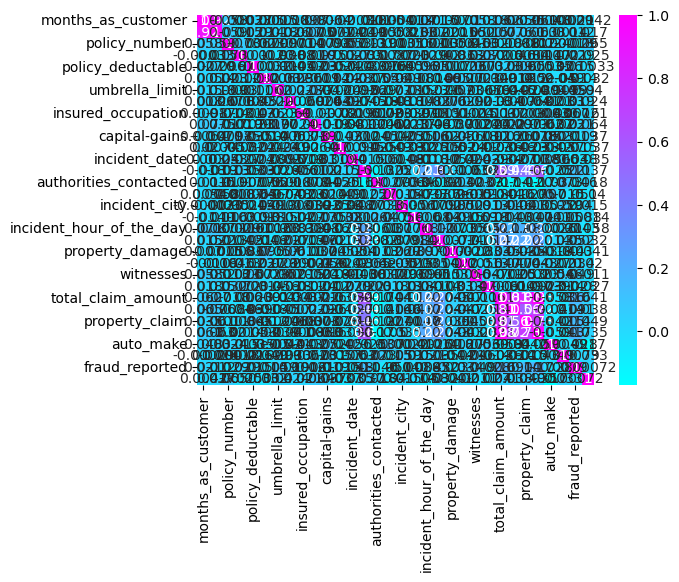

<Figure size 800x700 with 0 Axes>

In [298]:
corr_hmap = auto.corr()
sns.heatmap(corr_hmap,annot=True,cmap='cool')
plt.figure(figsize=(8,7))

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

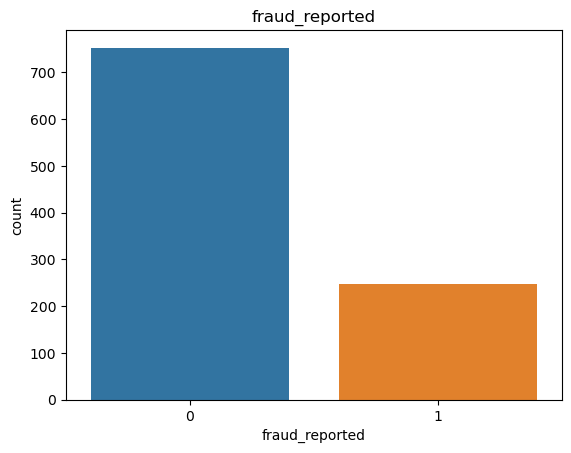

In [299]:
sns.countplot(x ='fraud_reported', data = auto)
plt.title('fraud_reported')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

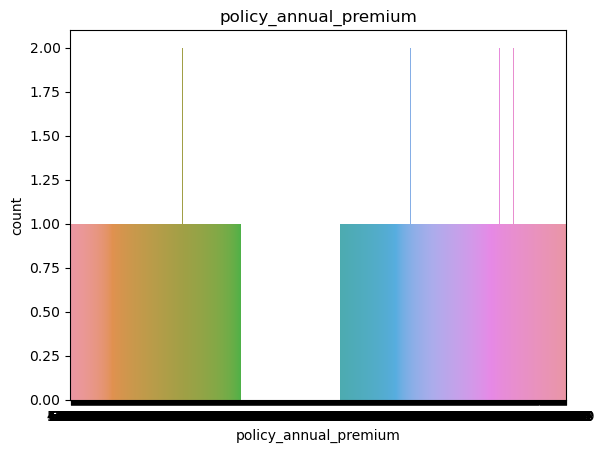

In [300]:
sns.countplot(x ='policy_annual_premium', data = auto)
plt.title('policy_annual_premium')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

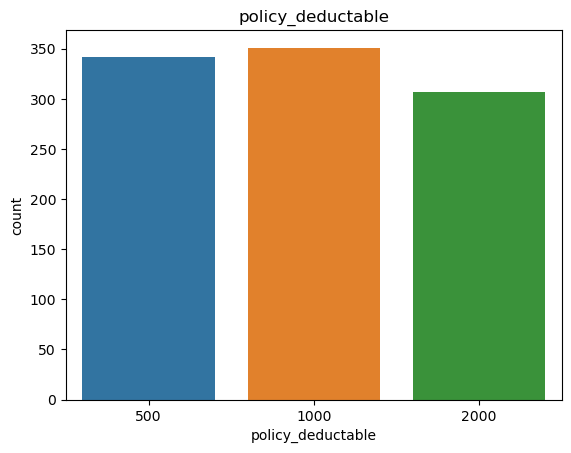

In [301]:
sns.countplot(x ='policy_deductable', data = auto)
plt.title('policy_deductable')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

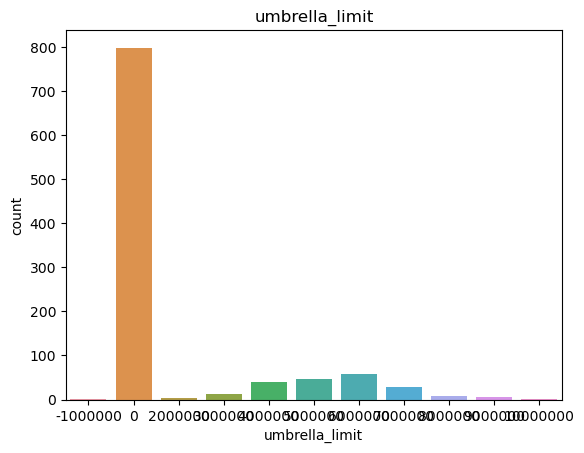

In [302]:
sns.countplot(x ='umbrella_limit', data = auto)
plt.title('umbrella_limit')
plt.show

# Dist Plot

<function matplotlib.pyplot.show(close=None, block=None)>

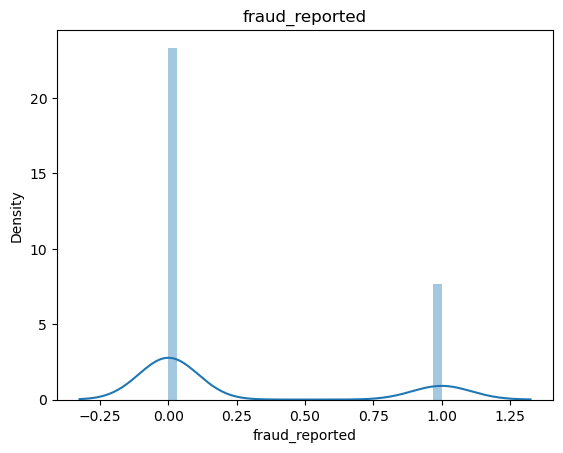

In [303]:
sns.distplot(auto['fraud_reported'])
plt.title('fraud_reported')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

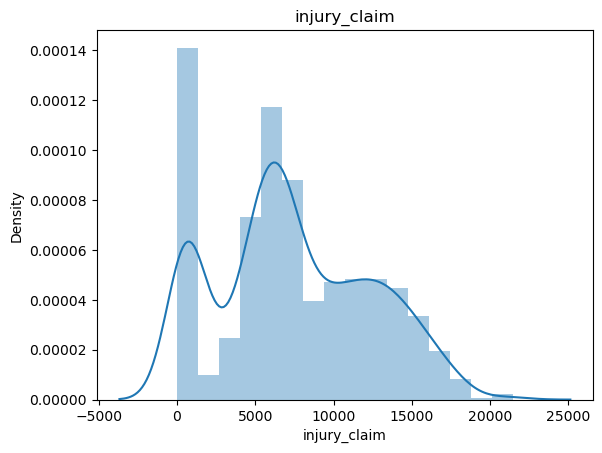

In [304]:
sns.distplot(auto['injury_claim'])
plt.title('injury_claim')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

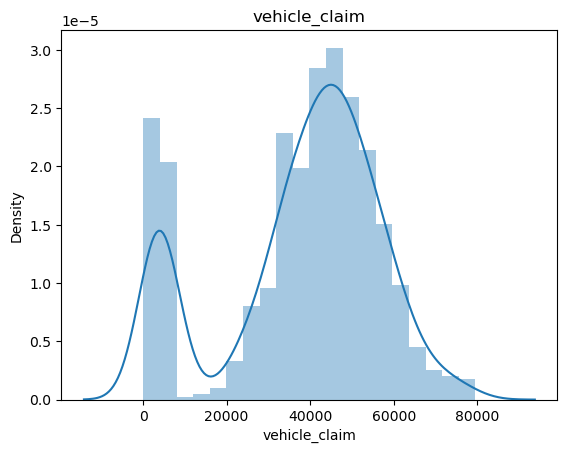

In [305]:
sns.distplot(auto['vehicle_claim'])
plt.title('vehicle_claim')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

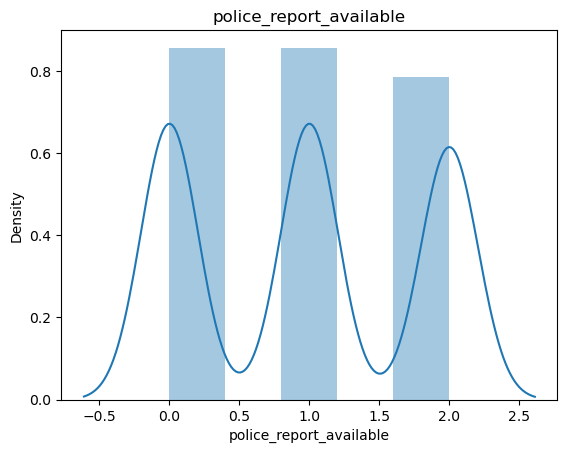

In [306]:
sns.distplot(auto['police_report_available'])
plt.title('police_report_available')
plt.show

# KDE PLot

<Axes: xlabel='fraud_reported', ylabel='Density'>

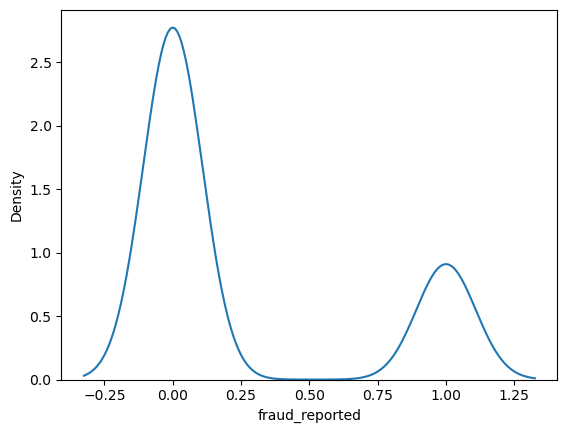

In [307]:
sns.kdeplot(data = auto.fraud_reported)

<Axes: xlabel='months_as_customer', ylabel='Density'>

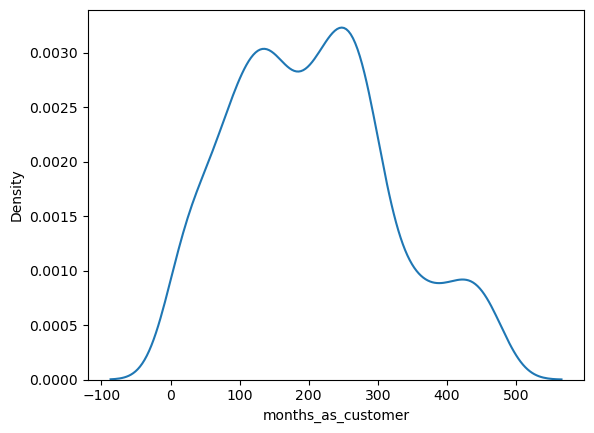

In [308]:
sns.kdeplot(data = auto.months_as_customer)

# Bar Plot

<Axes: xlabel='fraud_reported', ylabel='policy_deductable'>

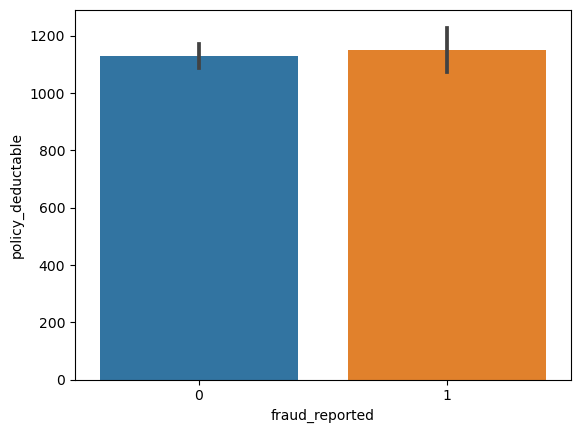

In [309]:
sns.barplot(x='fraud_reported',y='policy_deductable',data=auto)

<Axes: xlabel='fraud_reported', ylabel='umbrella_limit'>

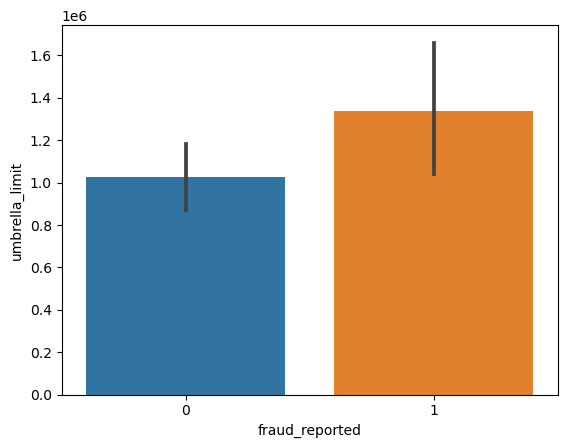

In [310]:
sns.barplot(x='fraud_reported',y='umbrella_limit',data=auto)

<Axes: xlabel='fraud_reported', ylabel='capital-gains'>

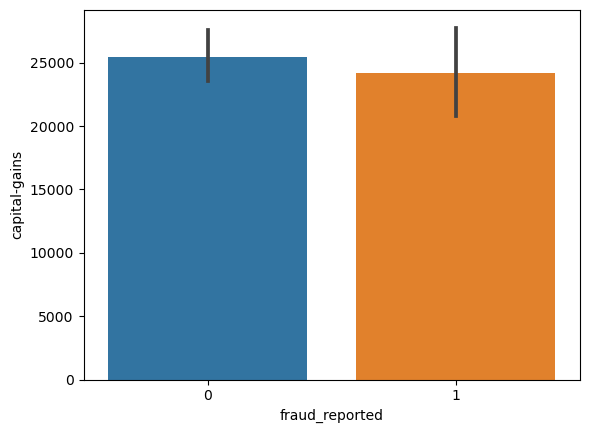

In [311]:
sns.barplot(x='fraud_reported',y='capital-gains',data=auto)

# Histogram

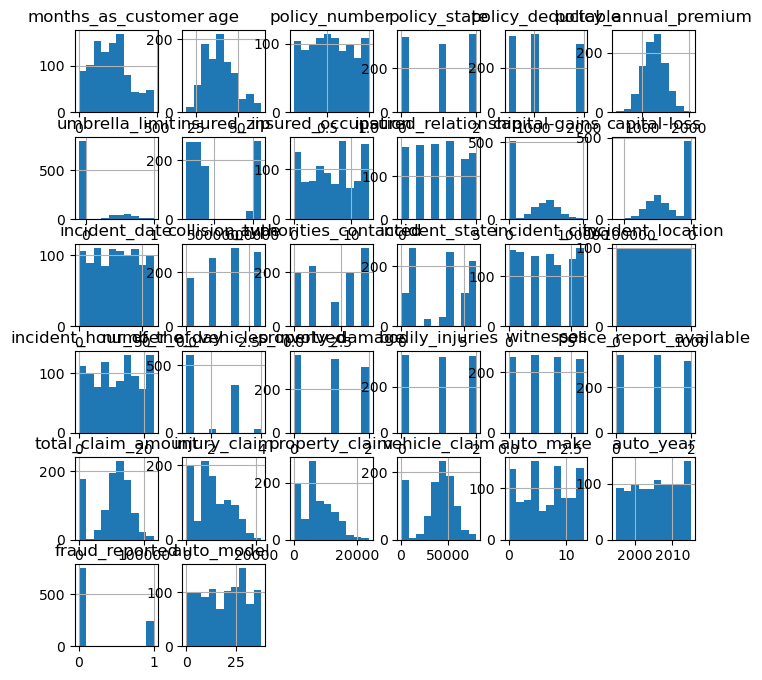

In [312]:
auto.hist(figsize=(8,8),bins=10)
plt.show()

# Scatter Plot

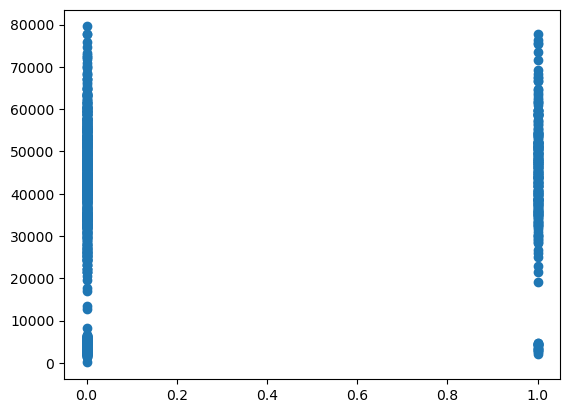

In [313]:
plt.scatter(auto['fraud_reported'],auto['vehicle_claim'])
plt.show()

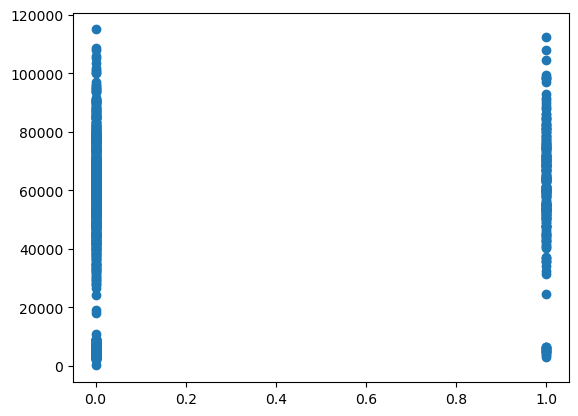

In [314]:
plt.scatter(auto['fraud_reported'],auto['total_claim_amount'])
plt.show()

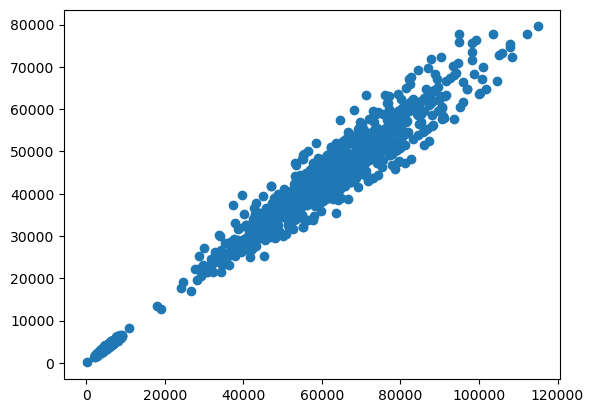

In [315]:
plt.scatter(auto['total_claim_amount'],auto['vehicle_claim'])
plt.show()

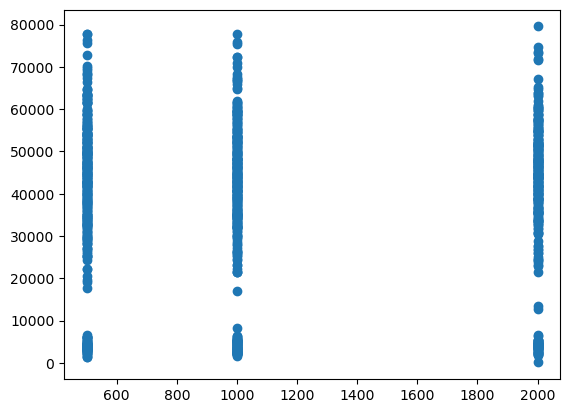

In [316]:
plt.scatter(auto['policy_deductable'],auto['vehicle_claim'])
plt.show()

# Pair Plot

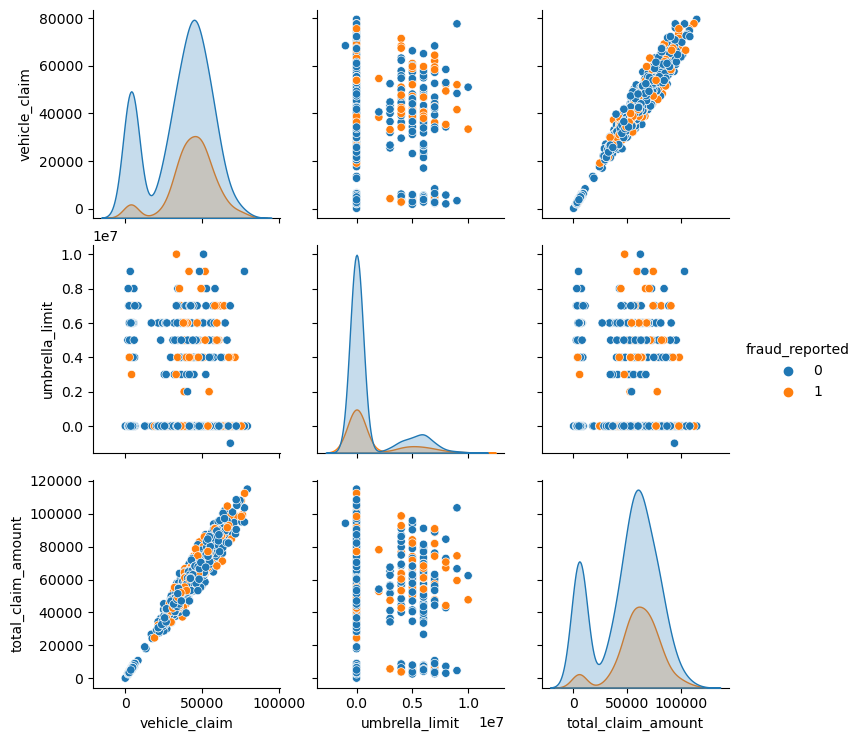

In [317]:
sns.pairplot(data=auto,hue='fraud_reported',vars=['vehicle_claim','umbrella_limit','total_claim_amount'])

# Joint Plot

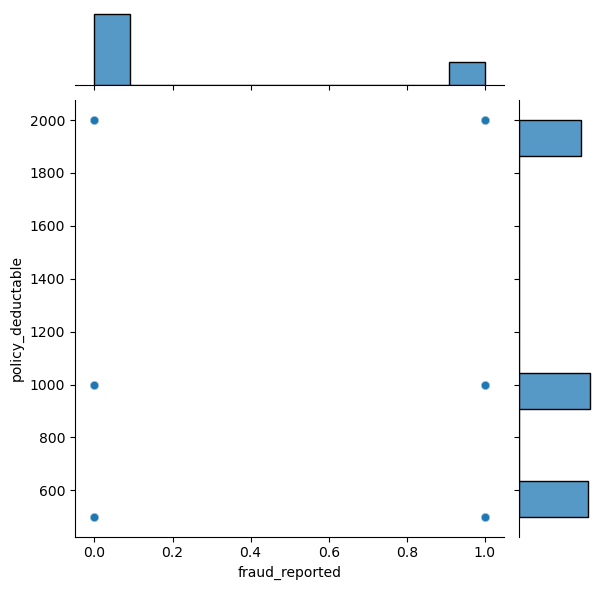

In [318]:
from scipy.stats import pearsonr
sns.jointplot(x='fraud_reported', y='policy_deductable', data=auto, alpha = 0.1)

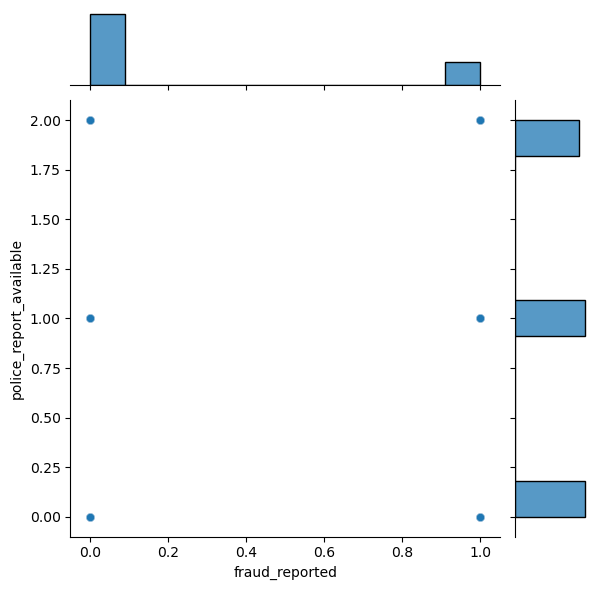

In [319]:
from scipy.stats import pearsonr
sns.jointplot(x='fraud_reported', y='police_report_available', data=auto, alpha = 0.1)

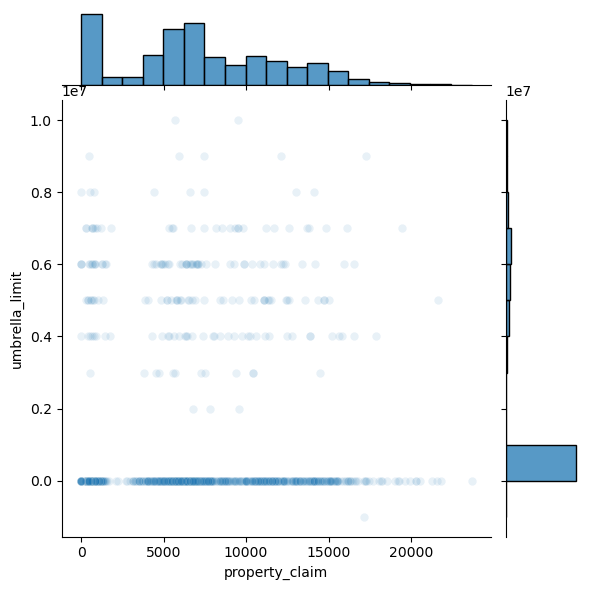

In [320]:
from scipy.stats import pearsonr
sns.jointplot(x='property_claim', y='umbrella_limit', data=auto, alpha = 0.1)

# Box Plot

months_as_customer                Axes(0.125,0.814746;0.133621x0.0652542)
age                            Axes(0.285345,0.814746;0.133621x0.0652542)
policy_number                   Axes(0.44569,0.814746;0.133621x0.0652542)
policy_state                   Axes(0.606034,0.814746;0.133621x0.0652542)
policy_deductable              Axes(0.766379,0.814746;0.133621x0.0652542)
policy_annual_premium             Axes(0.125,0.736441;0.133621x0.0652542)
umbrella_limit                 Axes(0.285345,0.736441;0.133621x0.0652542)
insured_zip                     Axes(0.44569,0.736441;0.133621x0.0652542)
insured_occupation             Axes(0.606034,0.736441;0.133621x0.0652542)
insured_relationship           Axes(0.766379,0.736441;0.133621x0.0652542)
capital-gains                     Axes(0.125,0.658136;0.133621x0.0652542)
capital-loss                   Axes(0.285345,0.658136;0.133621x0.0652542)
incident_date                   Axes(0.44569,0.658136;0.133621x0.0652542)
collision_type                 Axes(0.

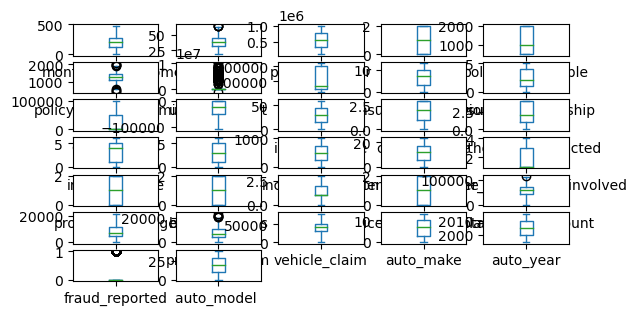

In [321]:
auto.plot(kind='box',subplots=True,layout=(10,5))

# Remove outliers using Z Score

In [322]:
from scipy.stats import zscore
z=np.abs(zscore(auto))
z

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,auto_model
0,1.078140,0.990836,0.095953,1.187173,0.222383,0.616705,0.479476,0.489529,1.158316,1.437957,...,0.461838,1.270313,0.714257,0.189283,1.165505,0.749653,0.856466,0.183440,1.746019,1.645743
1,0.208995,0.334073,0.791527,0.016856,1.412784,0.242521,1.697980,0.461008,0.162558,0.247595,...,1.338700,1.198712,1.807312,1.363822,1.372696,1.823346,0.360539,0.315491,1.746019,0.657470
2,0.608002,1.088913,0.550566,1.187173,1.412784,0.642233,1.697980,0.984885,1.082141,0.347586,...,1.362107,0.035801,0.686362,0.054644,0.736072,0.785565,0.631315,0.315491,0.572731,0.959702
3,0.452355,0.224613,1.239334,1.220886,1.412784,0.652886,2.133471,1.491682,1.407256,0.942766,...,0.461838,0.035801,0.403135,0.224130,0.219722,0.677607,0.879279,1.479664,1.746019,1.319074
4,0.208995,0.552994,0.695834,1.220886,0.222383,1.341980,2.133471,1.527808,1.082141,0.942766,...,0.438431,0.035801,1.753121,1.257232,1.399654,1.768252,1.623169,0.648112,0.572731,1.049545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,1.187173,0.222383,0.222884,0.479476,0.975717,1.158316,0.942766,...,0.438431,1.198712,1.305049,2.051155,0.273817,1.224309,0.135388,0.149180,0.572731,1.196528
996,0.704407,0.224613,1.398429,1.220886,0.222383,0.739141,0.479476,1.492519,0.584261,1.537947,...,1.362107,1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,1.645974,0.572731,0.780016
997,0.642767,0.541611,1.448920,1.187173,1.039966,0.520739,0.826998,0.815138,1.407256,0.247595,...,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,1.513924,0.572731,0.028570
998,2.208028,2.523284,0.047867,1.220886,1.412784,0.411866,1.697980,0.830250,0.411497,1.537947,...,0.438431,1.270313,0.219110,0.453708,0.451976,0.073580,1.375206,1.181303,0.572731,1.286371


In [323]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 26,  6,  6,  6,  5, 11,
        6,  6,  6], dtype=int64))


In [324]:
auto_new=auto[(z<3).all(axis=1)]

In [325]:
auto=auto_new
auto.shape

(980, 32)

# Training The Data

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [327]:
x_train.shape

(700, 31)

In [328]:
y_train.shape

(700,)

In [329]:
x_test.shape

(300, 31)

In [330]:
y_train.shape

(700,)

In [331]:
lg=LogisticRegression()

In [332]:
lg.fit(x_train,y_train)

LogisticRegression()

In [333]:
pred=lg.predict(x_test)

In [334]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [335]:
accuracy_score(y_test,pred)

0.7266666666666667

In [336]:

print(confusion_matrix(y_test,pred))

[[218   2]
 [ 80   0]]


<Axes: >

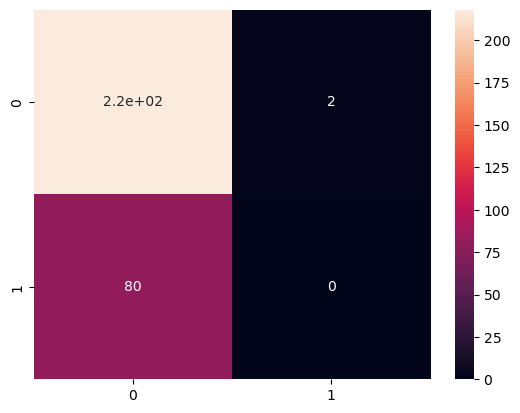

In [337]:

c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)

In [338]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



In [339]:
knn=KNeighborsClassifier()

In [340]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [341]:
predknn=knn.predict(x_test)

In [342]:
predknn

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [343]:
accuracy_score(y_test,predknn)

0.7033333333333334

In [344]:

print(confusion_matrix(y_test,predknn))

[[204  16]
 [ 73   7]]


<Axes: >

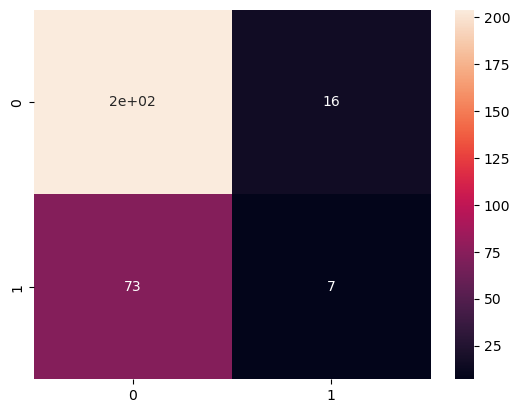

In [345]:

c=confusion_matrix(y_test,predknn)
sns.heatmap(c,annot=True)

In [346]:

print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       220
           1       0.30      0.09      0.14        80

    accuracy                           0.70       300
   macro avg       0.52      0.51      0.48       300
weighted avg       0.62      0.70      0.64       300



In [364]:
svm=SVC()

In [365]:
svm.fit(x_train,y_train)

SVC()

In [366]:
predsvm=svm.predict(x_test)

In [367]:
predsvm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [368]:
accuracy_score(y_test,predsvm)

0.73

In [417]:
dtc=DecisionTreeClassifier()

In [418]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [419]:
preddtc=dtc.predict(x_test)

In [420]:
preddtc

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [421]:
accuracy_score(y_test,preddtc)

0.66

<Axes: >

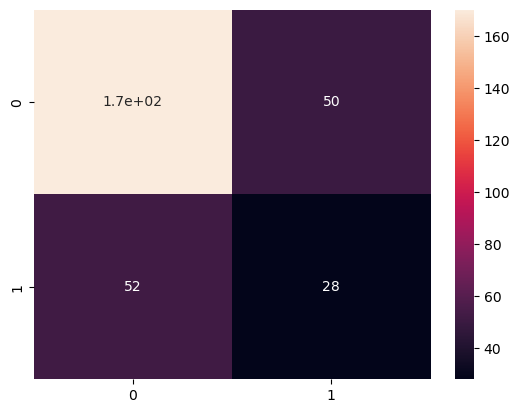

In [422]:
c=confusion_matrix(y_test,preddtc)
sns.heatmap(c,annot=True)

In [423]:
print(classification_report(y_test,preddtc))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       220
           1       0.36      0.35      0.35        80

    accuracy                           0.66       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.66      0.66      0.66       300



In [353]:
rfc=RandomForestClassifier()

In [354]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [355]:
predrfc=rfc.predict(x_test)

In [356]:
accuracy_score(y_test,predrfc)

0.7333333333333333

In [372]:
print(confusion_matrix(y_test,predrfc))

[[220   0]
 [ 80   0]]


<Axes: >

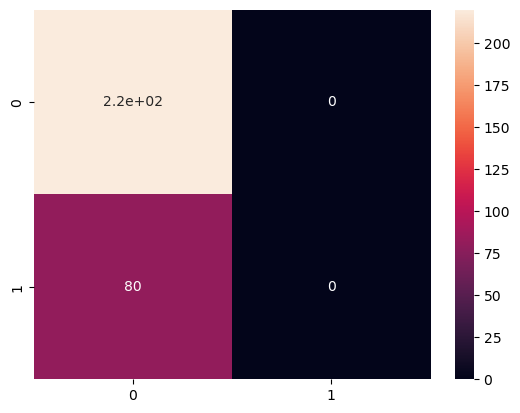

In [373]:
c=confusion_matrix(y_test,predrfc)
sns.heatmap(c,annot=True)

In [374]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       220
           1       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



In [357]:
gb=GradientBoostingClassifier()

In [358]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [359]:
predgb=gb.predict(x_test)

In [360]:
predgb

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [361]:
accuracy_score(y_test,predgb)

0.7

In [377]:
print(confusion_matrix(y_test,predgb))

[[208  12]
 [ 78   2]]


<Axes: >

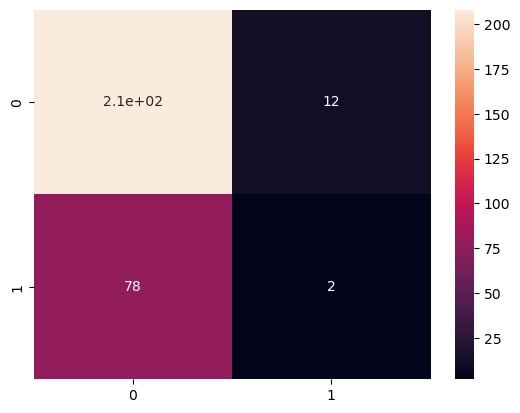

In [376]:
c=confusion_matrix(y_test,predgb)
sns.heatmap(c,annot=True)

In [375]:
print(classification_report(y_test,predgb))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       220
           1       0.14      0.03      0.04        80

    accuracy                           0.70       300
   macro avg       0.44      0.49      0.43       300
weighted avg       0.57      0.70      0.61       300



In [215]:
gm=GaussianNB()

In [216]:
gm.fit(x_train,y_train)

GaussianNB()

In [217]:
predgm=gm.predict(x_test)

In [369]:
accuracy_score(y_test,predgm)

0.5866666666666667

In [378]:
print(confusion_matrix(y_test,predgm))

[[154  66]
 [ 58  22]]


<Axes: >

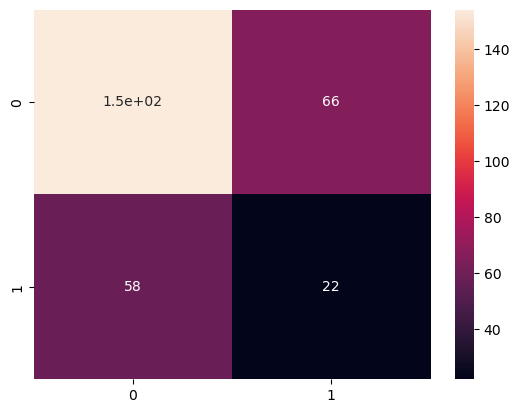

In [379]:
c=confusion_matrix(y_test,predgm)
sns.heatmap(c,annot=True)

In [380]:
print(classification_report(y_test,predgm))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       220
           1       0.25      0.28      0.26        80

    accuracy                           0.59       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.60      0.59      0.59       300



# AUC/ROC Curve

In [381]:
Y_pred_proba=lg.predict_proba(x_test)[:,1]

In [382]:
Y_pred_proba

array([0.23580462, 0.20038103, 0.18529251, 0.2006742 , 0.15411273,
       0.18969908, 0.39626245, 0.25991737, 0.17178475, 0.12286641,
       0.17024911, 0.33147349, 0.15701349, 0.17257821, 0.36545023,
       0.11225069, 0.15731584, 0.25532858, 0.22642362, 0.20272463,
       0.13611189, 0.15660923, 0.22742009, 0.09026966, 0.1769369 ,
       0.27811237, 0.2713682 , 0.27944318, 0.2671    , 0.39519745,
       0.25674777, 0.24764185, 0.1574818 , 0.25588563, 0.21697432,
       0.24807167, 0.25295712, 0.17510585, 0.26619117, 0.19125612,
       0.17501603, 0.26754971, 0.26025328, 0.2882032 , 0.22591923,
       0.21720673, 0.0985558 , 0.32842098, 0.12436567, 0.15302567,
       0.32969871, 0.22822689, 0.31045455, 0.19286079, 0.49093379,
       0.21274268, 0.16572922, 0.47585879, 0.20680376, 0.18394511,
       0.32425264, 0.14638696, 0.24114104, 0.13341135, 0.40167357,
       0.15759629, 0.34631257, 0.20131486, 0.20651565, 0.18444328,
       0.37006929, 0.31640524, 0.43869979, 0.31773165, 0.21061

In [383]:
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)

In [384]:
fpr

array([0.        , 0.00454545, 0.00909091, 0.00909091, 0.01818182,
       0.01818182, 0.05454545, 0.05454545, 0.08636364, 0.08636364,
       0.09545455, 0.09545455, 0.10454545, 0.10454545, 0.10909091,
       0.10909091, 0.15      , 0.15      , 0.17272727, 0.17272727,
       0.18181818, 0.18181818, 0.20909091, 0.20909091, 0.21363636,
       0.21363636, 0.22272727, 0.22272727, 0.23181818, 0.23181818,
       0.24090909, 0.24090909, 0.24545455, 0.24545455, 0.25      ,
       0.25      , 0.25909091, 0.25909091, 0.27272727, 0.27272727,
       0.28636364, 0.28636364, 0.3       , 0.3       , 0.34090909,
       0.34090909, 0.35      , 0.35      , 0.35454545, 0.35454545,
       0.42727273, 0.42727273, 0.44090909, 0.44090909, 0.47272727,
       0.47272727, 0.48181818, 0.48181818, 0.50454545, 0.50454545,
       0.51363636, 0.51363636, 0.51818182, 0.51818182, 0.52272727,
       0.52272727, 0.57272727, 0.57272727, 0.58181818, 0.58181818,
       0.59090909, 0.59090909, 0.6       , 0.6       , 0.62272

In [385]:
tpr

array([0.    , 0.    , 0.    , 0.025 , 0.025 , 0.0375, 0.0375, 0.05  ,
       0.05  , 0.0875, 0.0875, 0.1   , 0.1   , 0.1125, 0.1125, 0.125 ,
       0.125 , 0.1375, 0.1375, 0.1625, 0.1625, 0.175 , 0.175 , 0.2125,
       0.2125, 0.225 , 0.225 , 0.25  , 0.25  , 0.2625, 0.2625, 0.2875,
       0.2875, 0.3125, 0.3125, 0.3375, 0.3375, 0.3625, 0.3625, 0.375 ,
       0.375 , 0.3875, 0.3875, 0.4   , 0.4   , 0.4375, 0.4375, 0.4625,
       0.4625, 0.475 , 0.475 , 0.4875, 0.4875, 0.5   , 0.5   , 0.5125,
       0.5125, 0.525 , 0.525 , 0.55  , 0.55  , 0.575 , 0.575 , 0.6   ,
       0.6   , 0.6125, 0.6125, 0.625 , 0.625 , 0.65  , 0.65  , 0.6625,
       0.6625, 0.675 , 0.675 , 0.7   , 0.7   , 0.7125, 0.7125, 0.725 ,
       0.725 , 0.7375, 0.7375, 0.75  , 0.75  , 0.7875, 0.7875, 0.8   ,
       0.8   , 0.8125, 0.8125, 0.825 , 0.825 , 0.8375, 0.8375, 0.85  ,
       0.85  , 0.8875, 0.8875, 0.9   , 0.9   , 0.925 , 0.925 , 0.9375,
       0.9375, 0.9625, 0.9625, 0.975 , 0.975 , 0.9875, 0.9875, 1.    ,
      

In [386]:
thresholds

array([1.535717  , 0.535717  , 0.52021514, 0.48911019, 0.47585879,
       0.44056665, 0.39781976, 0.39637717, 0.38195101, 0.37538645,
       0.37006929, 0.36545023, 0.35529191, 0.35219585, 0.34899238,
       0.34891684, 0.33147349, 0.32990674, 0.3275698 , 0.32453244,
       0.31942986, 0.31929033, 0.31603853, 0.30992134, 0.3067729 ,
       0.30610669, 0.30372704, 0.29946015, 0.29611648, 0.29452624,
       0.29143203, 0.28713452, 0.28688165, 0.28624108, 0.28587399,
       0.2828688 , 0.28224677, 0.27944318, 0.27811237, 0.27553911,
       0.27317327, 0.27240664, 0.2678523 , 0.26754971, 0.26008094,
       0.25825197, 0.25674777, 0.2559118 , 0.25588563, 0.25532858,
       0.24266368, 0.24123061, 0.23957823, 0.23928386, 0.2280542 ,
       0.22748706, 0.22655896, 0.22642362, 0.22177311, 0.22079714,
       0.2199054 , 0.21791641, 0.21783247, 0.21708236, 0.21707071,
       0.21702026, 0.2113374 , 0.21061081, 0.20680376, 0.20272463,
       0.20242587, 0.2019984 , 0.20176773, 0.20167082, 0.20038

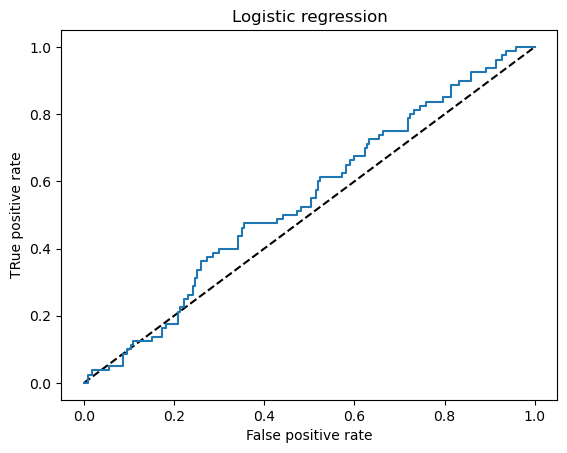

In [403]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Logistic regression')
plt.show()

In [404]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [405]:
print(auc_score)

0.4954545454545455


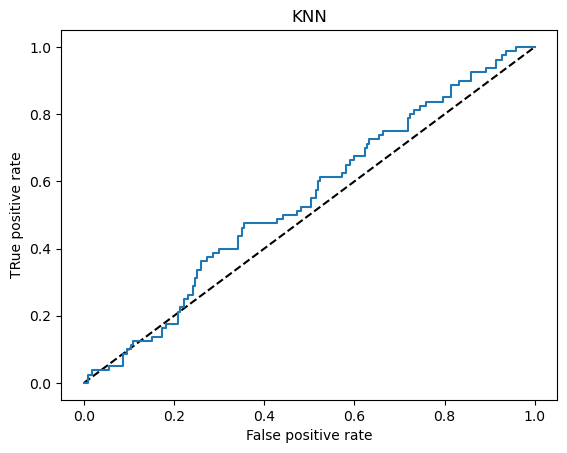

In [406]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('KNN')
plt.show()


In [407]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [408]:
print(auc_score)

0.5073863636363636


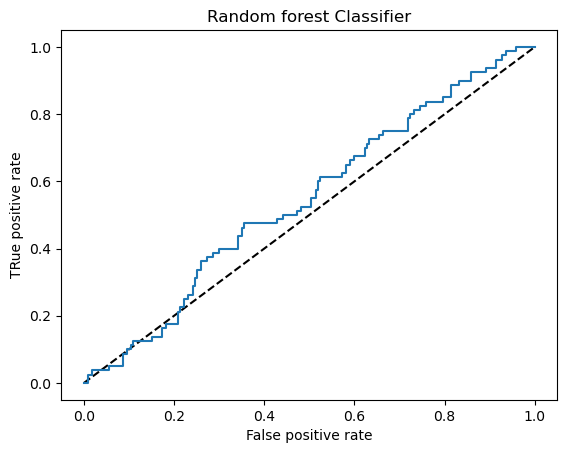

In [409]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Random forest Classifier')
plt.show()

In [410]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [411]:
print(auc_score)

0.5


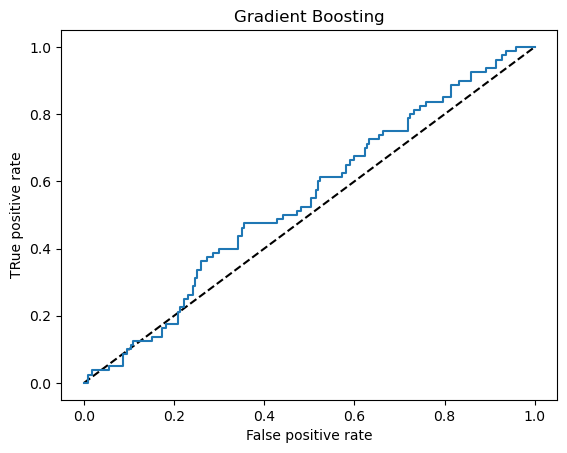

In [412]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Gradient Boosting')
plt.show()

In [413]:
auc_score=roc_auc_score(y_test,gb.predict(x_test))

In [414]:
print(auc_score)

0.4852272727272727


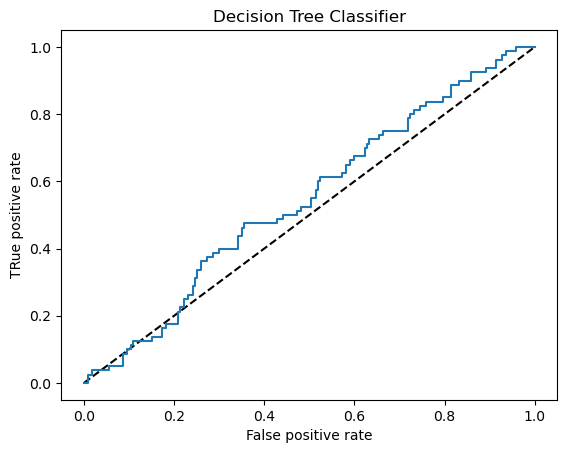

In [424]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [425]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))

In [426]:
print(auc_score)

0.5613636363636364


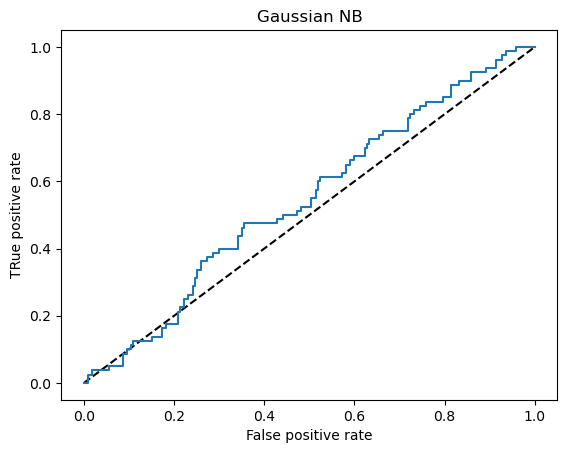

In [427]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian NB')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Gaussian NB')
plt.show()

In [428]:
auc_score=roc_auc_score(y_test,gm.predict(x_test))

In [429]:
print(auc_score)

0.5443181818181818


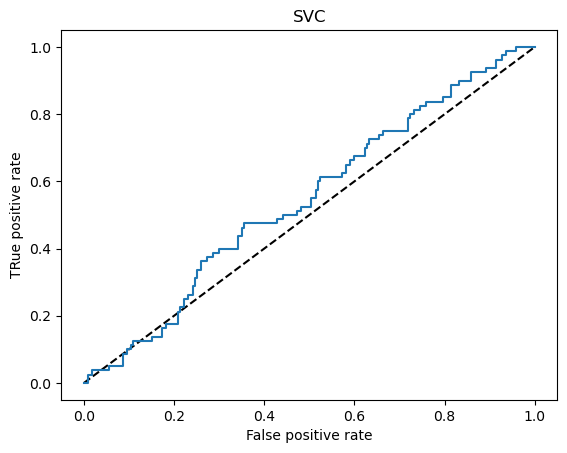

In [435]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('SVC')
plt.show()

In [437]:
auc_score=roc_auc_score(y_test,svm.predict(x_test))

In [438]:
print(auc_score)

0.49772727272727274


# Cross Validation Score

In [219]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lg,x_train,y_train,cv=k_folds)

In [430]:
print('The Best score for Logistic Model is',score.mean())

The Best score for Logistic Model is 0.7557142857142857


In [431]:
score=cross_val_score(knn,x_train,y_train,cv=k_folds)

In [432]:
print('The Best score for KNN Model is',score.mean())

The Best score for KNN Model is 0.7042857142857143


In [433]:
score=cross_val_score(svm,x_train,y_train,cv=k_folds)

In [434]:
print('The Best score for SVC Model is',score.mean())

The Best score for SVC Model is 0.7614285714285713


In [439]:
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)

In [440]:
print('The Best score for RFC Model is',score.mean())

The Best score for RFC Model is 0.7585714285714286


In [441]:
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)

In [442]:
print('The Best score for DTC Model is',score.mean())

The Best score for DTC Model is 0.6371428571428571


In [443]:
score=cross_val_score(gb,x_train,y_train,cv=k_folds)

In [444]:
print('The Best score for Gradient Boosting Model is',score.mean())

The Best score for Gradient Boosting Model is 0.7100000000000001


In [445]:
score=cross_val_score(gm,x_train,y_train,cv=k_folds)

In [446]:
print('The Best score for Gaussian NB  Model is',score.mean())

The Best score for Gaussian NB  Model is 0.7228571428571428


# Hyperparamter tuning of the best model 

In [454]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [456]:
from sklearn.model_selection import RandomizedSearchCV
svm_random=RandomizedSearchCV(estimator=svm,param_distributions=param_grid,n_iter=20,verbose=4,cv=5,random_state=35,n_jobs=11)

In [457]:
svm_cv=RandomizedSearchCV(SVC(),param_grid,cv=5)
svm_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [458]:
print('Best Parameters',svm_cv.best_params_)

Best Parameters {'gamma': 0.1, 'C': 100}


In [465]:
s_fit=SVC(gamma= 0.1, C= 100)

In [466]:
s_fit.fit(x_train,y_train)

SVC(C=100, gamma=0.1)

In [467]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':s_fit.predict(x_test)})

In [468]:
df

,Actual Data,predicted Data
521,0,0
737,0,0
740,0,0
660,0,0
411,0,0
...,...,...
468,0,0
935,1,0
428,1,0
7,0,0


In [ ]:
#SVC is the best selected model selected according to the cross validation scores

# Saving The Best Model

In [470]:
import pickle

In [472]:
saved_model=pickle.dumps(svm)

In [473]:
svm_from_pickle=pickle.loads(saved_model)

In [474]:
svm_from_pickle.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])